In [22]:
# Use this notebook to plot rocs 
# Imports 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib.cm import get_cmap
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [6]:
# Raw file
raw_file = "run4/cross_validation/merge_result_table/all_langs-result.csv"
df = pd.read_csv(raw_file)

In [9]:
# Get unique classifiers and datasets
methods = df['method_name'].unique()
datasets = df['dataset'].unique()

In [20]:
# def plot_s(df):
#     methods = df['method_name'].unique()
#     datasets = df['dataset'].unique()
    
#     # Initialize a figure and subplots for plotting
#     fig, axs = plt.subplots(len(datasets), 1, figsize=(10, 6 * len(datasets)))
    
#     # Get a colormap to generate colors
#     cmap = plt.get_cmap('tab10')
    
#     # Iterate over each dataset
#     for i, dataset in enumerate(datasets):
#         # Initialize lists to store fpr, tpr, and auc for each method
#         fprs = []
#         tprs = []
#         aucs = []
        
#         # Iterate over each method
#         for method in methods:
#             # Filter dataframe for the current dataset and method
#             subset_df = df[(df['dataset'] == dataset) & (df['method_name'] == method)]
            
#             # Calculate ROC curve and AUC
#             fpr, tpr, auc = calculate_roc_auc(subset_df['y'], subset_df['phat'])
            
#             # Store fpr, tpr, and auc
#             fprs.append(fpr)
#             tprs.append(tpr)
#             aucs.append(auc)
        
#         # Sort methods based on AUC values
#         sorted_methods = [method for _, method in sorted(zip(aucs, methods), reverse=True)]
        
#         # Plot ROC curves for all methods for the current dataset
#         for method in sorted_methods:
#             method_df = df[(df['dataset'] == dataset) & (df['method_name'] == method)]
#             fpr, tpr, auc = calculate_roc_auc(method_df['y'], method_df['phat'])
#             color = cmap(sorted_methods.index(method) / len(sorted_methods))
#             axs[i].plot(fpr, tpr, label=f'{method} (AUC = {auc:.2f})', color=color)
        
#         # Calculate and plot the baseline ROC curve
#         baseline_fpr = np.linspace(0, 1, 100)
#         baseline_tpr = baseline_fpr
#         axs[i].plot(baseline_fpr, baseline_tpr, linestyle='--', color='gray', label='Baseline (AUC = 0.50)')
        
#         # Add labels and legend for the current subplot
#         axs[i].set_xlabel('False Positive Rate')
#         axs[i].set_ylabel('True Positive Rate')
#         axs[i].set_title(f'ROC Curves for Dataset: {dataset}')
#         axs[i].legend(loc='lower right')
    
#     # Adjust layout
#     plt.tight_layout()
    
#     # Show the plot
#     plt.show()

In [4]:
# calculate ROC curve and AUC
def calculate_roc_auc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc = roc_auc_score(y_true, y_score)
    return fpr, tpr, auc

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_s(df, fontsize=16):
    sns.set(style="whitegrid", context="notebook", rc={"axes.edgecolor": "black"})
    
    fig, axs = plt.subplots(3, 2, figsize=(16, 18))
    colors = sns.color_palette("tab10")
    legend_handles_all = []  # List to store legend handles for the super legend
    unique_methods = set()  # Set to store unique method names
    
    for ax, dataset in zip(axs.flatten(), df['dataset'].unique()):
        legend_handles = []
        
        for idx, method in enumerate(df['method_name'].unique()):
            subset_df = df[(df['dataset'] == dataset) & (df['method_name'] == method)]
            fpr, tpr, auc = calculate_roc_auc(subset_df['y'], subset_df['phat'])
            color = colors[idx % len(colors)]
            line, = ax.plot(fpr, tpr, label=f'{method} (AUC = {auc:.2f})', color=color)
            legend_handles.append((line, f'{method} (AUC = {auc:.2f})'))
            legend_handles_all.append((line, f'{method} (AUC = {auc:.2f})'))  # Append to super legend
            unique_methods.add((method, color))  # Add unique method-color combination
            
        baseline_auc = 0.5
        line, = ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label=f'Baseline (AUC = {baseline_auc:.2f})')
        legend_handles.append((line, f'Baseline (AUC = {baseline_auc:.2f})'))
        legend_handles_all.append((line, f'Baseline (AUC = {baseline_auc:.2f})'))  # Append to super legend
        unique_methods.add(('Baseline', 'gray'))  # Add baseline to unique methods
        
        legend_handles.sort(key=lambda x: float(x[1].split('=')[-1].split(')')[0]), reverse=True)
        sorted_lines, sorted_labels = zip(*legend_handles)
        
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.tick_params(axis='both', which='both', labelsize=fontsize) 
        ax.set_title(f'{dataset}', fontsize=fontsize + 2)
        
        ax.legend(sorted_lines, sorted_labels, loc='lower right', fontsize=fontsize-2)
    # Set super xlabel and ylabel
    fig.supxlabel('False Positive Rate', fontsize=fontsize+2)
    fig.supylabel('True Positive Rate', fontsize=fontsize+2)

 
    # Increase font size of each subplot
    #for ax in axs.flatten():
        #ax.tick_params(axis='both', which='major', labelsize=15)  # Adjust font size of tick labels
    # Create super legend below the grid
    super_legend_handles = [(plt.Line2D([], [], color=color, linestyle='-'), method) for method, color in unique_methods]
    super_legend = fig.legend(*zip(*super_legend_handles), loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.05))
    for text in super_legend.get_texts():
        text.set_fontsize(fontsize+2)  # Increase font size of the legend text
    # Add super title
    #fig.suptitle('ROC Curves for method vs dataset', fontsize=24)
    plt.tight_layout()
    plt.savefig("roc_curve.png")
    plt.show()



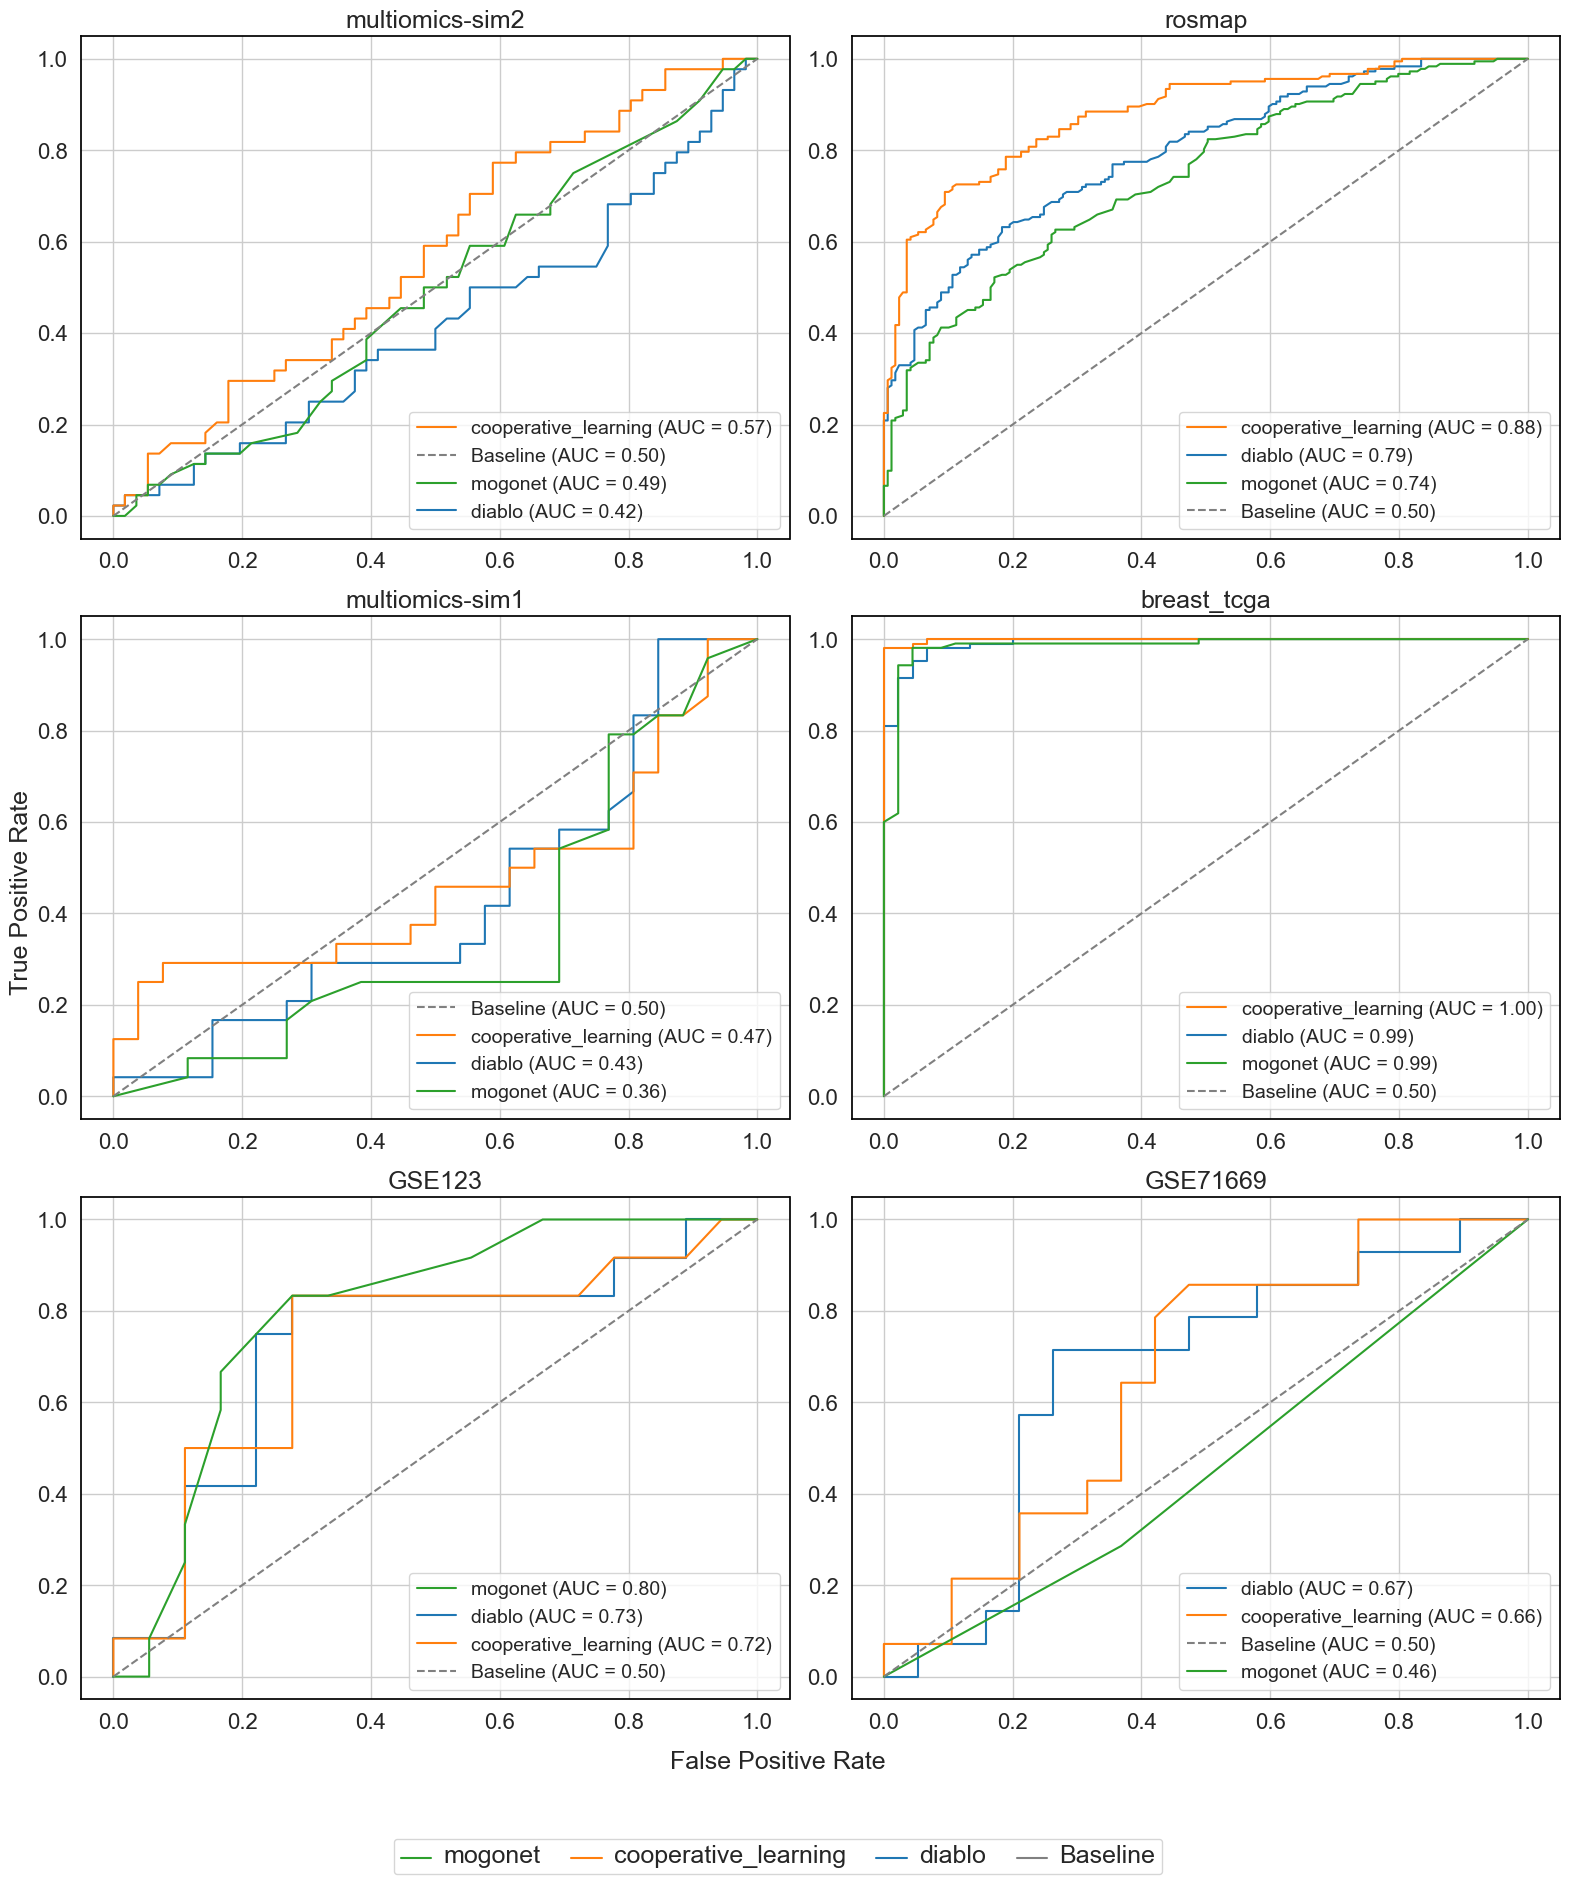

In [196]:
plot_s(df)

In [190]:
plt.savefig("roc_curve.png")

<Figure size 640x480 with 0 Axes>